In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#load the data after updating them using Generator.ipynb (Instructions, Resources)
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [4]:
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [5]:
#train_df.columns

In [6]:
#test_df.columns

In [7]:
# Convert categorical data to numeric (training data)
X_train = pd.get_dummies(train_df.drop(columns = ["target"]))
# Separate target feature for training data (y_train)
y_train = train_df["target"]
ynum_train = LabelEncoder().fit_transform(train_df['target'])
# Convert categorical data to numeric (testing data)
X_test = pd.get_dummies(test_df.drop(columns = ["target"]))
# Separate target feature for testing data (y_test)
y_test = test_df["target"]
ynum_test = LabelEncoder().fit_transform(test_df["target"])

In [8]:
y_test[2300:2400]

2300     low_risk
2301     low_risk
2302     low_risk
2303     low_risk
2304     low_risk
          ...    
2395    high_risk
2396    high_risk
2397    high_risk
2398    high_risk
2399    high_risk
Name: target, Length: 100, dtype: object

In [9]:
ynum_test[2300:2400]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Add missing dummy variables to testing set
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col]=0

In [11]:
X_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,0,1,0,1,1,0,0,1,1,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,1,0,1,1,0,1,0,1,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,1,0,1,1,0,0,1,1,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,1,1,0,1,1,0,1,0,1,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,0,1,0,1,1,0,1,0,1,0


In [12]:
#X_test.columns

In [13]:
#X_train.columns

In [28]:
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (12180, 92), Test: (4702, 92)


In [14]:
# Train the Logistic Regression model on the unscaled data and print the model score
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
#print(f"Training Data Score: {lr.score (X_train, y_train)}")
#print(f"Testing  Data Score: {lr.score (X_test, y_test)}")
print(f"Training dataset score: {train_score}")
print(f"Test dataset score: {test_score }")

Training dataset score: 0.6529556650246305
Test dataset score: 0.5074436410038281


C:\Users\jksmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train,y_train)
#random_train = clf.score(X_train, y_train)
#random_test = clf.score(X_test, y_test)
#print(f"Random Training dataset score: {random_train}")
#print(f"Random Test dataset score: {random_score }")
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6446193109315185


In [21]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
# Train the Logistic Regression model on the scaled data and print the model score
clr = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Testing Score: 0.49319438536792853


C:\Users\jksmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jksmi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
# # Create a confusion matrix  score
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = clr.predict(X_test_scaled)
confusion_matrix(y_true,y_pred)

array([[1764,  587],
       [ 542, 1809]], dtype=int64)

In [25]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6480221182475542


In [26]:
#Select the most important features
features = clf.feature_importances_
print(features)

[1.64175246e-02 3.36047005e-02 3.07032294e-02 1.42239163e-02
 1.54887781e-02 2.97922850e-03 4.27051795e-03 8.55840612e-03
 1.33532005e-03 1.51577257e-02 1.16142472e-02 2.95307776e-02
 2.99764667e-02 4.53332754e-02 4.48443196e-02 5.25173382e-02
 4.98329797e-02 1.62671260e-02 0.00000000e+00 0.00000000e+00
 9.97444637e-02 6.56760511e-04 0.00000000e+00 0.00000000e+00
 4.27868968e-03 1.34563223e-02 4.63160385e-03 6.58760719e-03
 4.03294385e-03 6.17692505e-03 1.18528253e-02 1.31099214e-02
 1.40812113e-02 5.12304140e-03 7.78349300e-03 1.53878110e-02
 1.33159958e-02 1.54529099e-02 5.98482161e-03 6.83047428e-03
 7.85674268e-03 9.78167759e-03 1.39355711e-02 1.55873811e-02
 1.40840046e-02 2.93482835e-04 0.00000000e+00 1.54613564e-02
 1.62359542e-02 1.18244670e-02 1.00680524e-02 5.67200574e-03
 1.29851695e-02 1.18672718e-02 3.62464457e-03 7.08920963e-03
 7.86624182e-03 7.36513040e-03 8.69878830e-03 1.01283162e-02
 8.34738211e-03 9.97869361e-03 7.97169822e-03 8.66230546e-03
 0.00000000e+00 0.000000

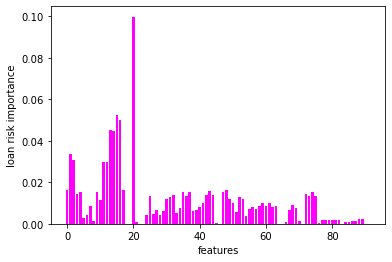

In [89]:
features = clf.feature_importances_
plt.bar(x = range(len(features)), height=features, color='magenta')
#Call imshow() to display 2-D data as an image
#img = plt.imshow(height)
# Scaling colorbar by factor 0.5
#plt.colorbar(shrink=0.5)

plt.ylabel('loan risk importance', rotation=90)
plt.xlabel('features')
plt.show()

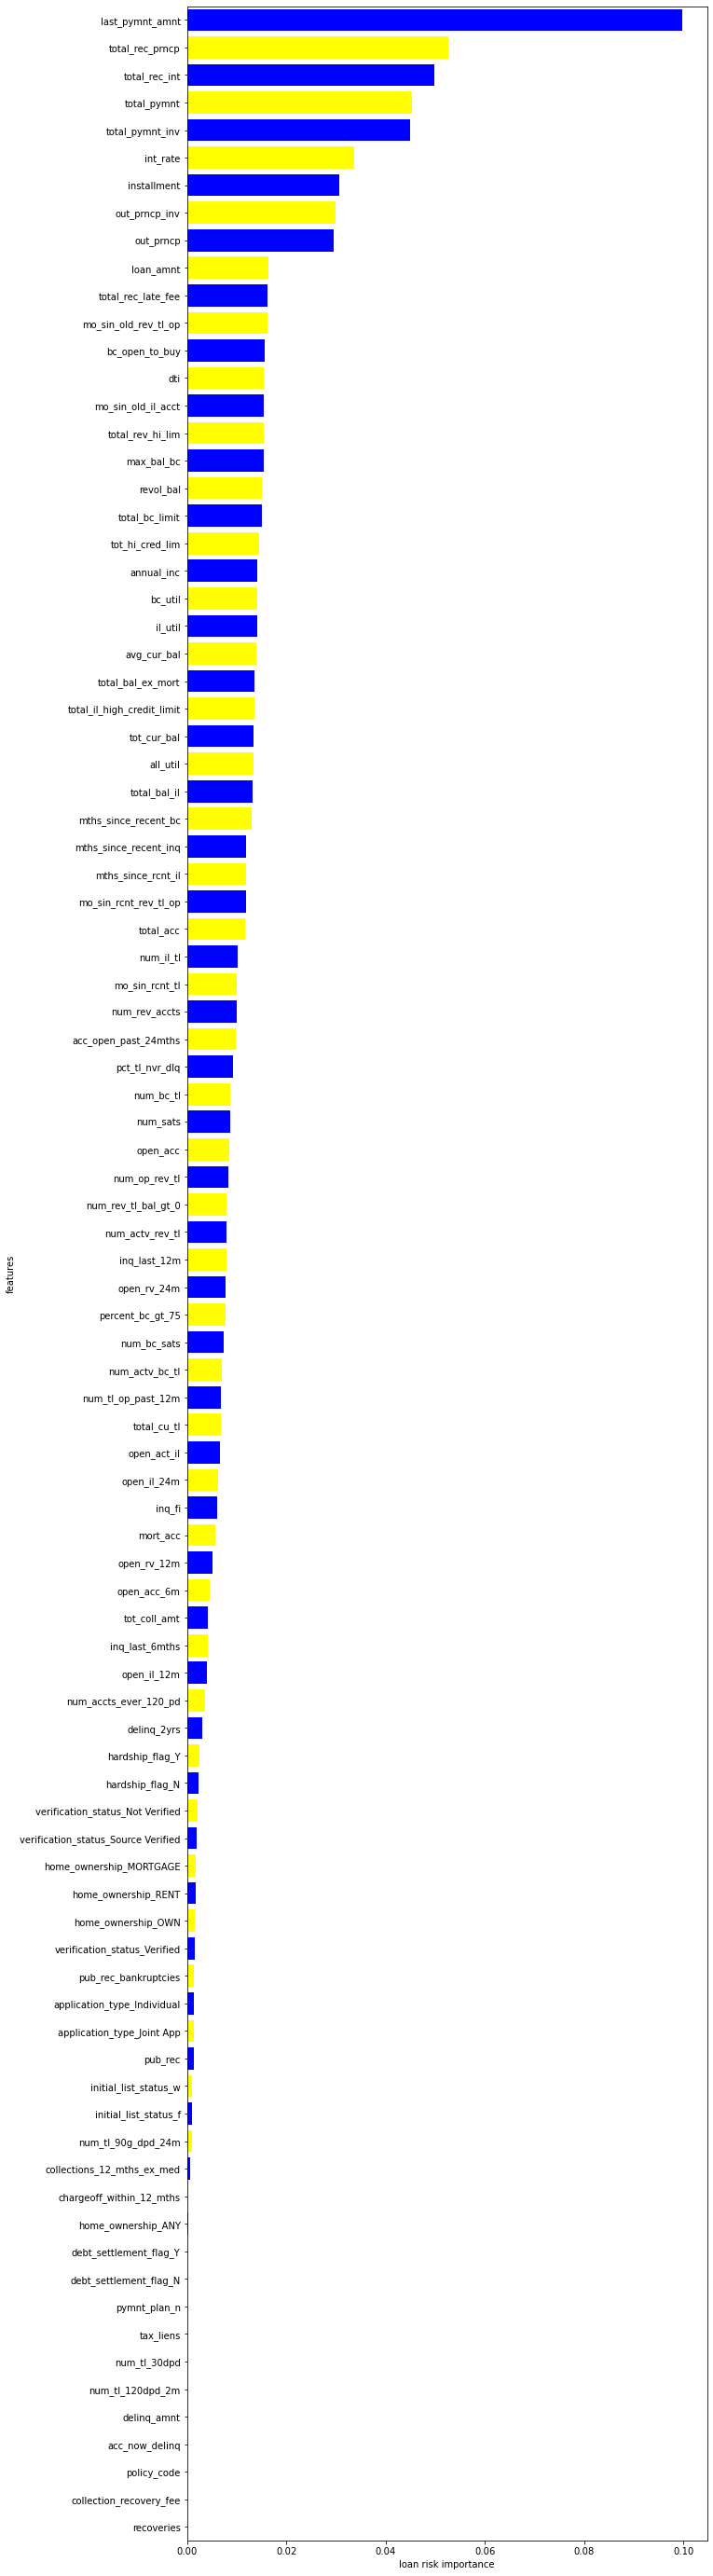

In [95]:

features = sorted(zip(X_train.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)
#plt.figure(figsize=(6,6))

colors=['yellow', 'blue']

ax.barh(y=cols, width=width, color=colors)

plt.xlabel('loan risk importance')
plt.ylabel('features')

# Call imshow() to display 2-D data as an image
#img = plt.imshow(loan risk importance)
# Scaling colorbar by factor 0.5
#plt.colorbar(shrink=0.5)

plt.show()